### CSCI 6330
### Group Members: Thomas, Ahmeed, Eben, Tingting

### Data proprecssing without MPI

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler   #for scaling data

#specify the scaling type
scaler =MinMaxScaler()
#get the start time
start =process_time()

#load the data
data =pd.read_csv("tndata.csv")

#define the preprocess function
def data_process(data, scaler, cs ="yes"):
    #reverse index
    tdata=data.reindex(index=data.index[::-1])
    #get the infected 
    I=tdata['TOTAL_CONFIRMED']
    #get the recovered
    R =tdata['TOTAL_INACTIVE_RECOVERED']
    #get the length of the data
    nn =len(I)
    # show whether want to scaling
    if cs =="yes": ##indicate yes
        tt=np.linspace(0,nn, nn)
        y1 =np.array(I[:nn]).reshape((-1,1))
        y2 =np.array(R[:nn]).reshape((-1,1))
        #scaling
        II =scaler.fit_transform(y1)
        RR =scaler.fit_transform(y2)
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Scaled Data Without MPI')
        plt.savefig('scal.png')
        plt.show()
    else:  ##indicate no
        tt=np.linspace(0,nn, nn)
        II =np.array(I[:nn])
        RR =np.array(R[:nn])
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('UnScaled Data Without MPI')
        plt.savefig('unscal.png')
        plt.show()    
    return 



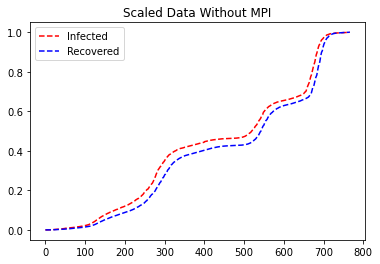

++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++

CPU time for data preprocessing with scaling in seconds: 0.21690231600000054


In [2]:
#get the start time
start =process_time()

data_process(data, scaler, "yes")

stop = process_time()

print("++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing with scaling in seconds:",stop-start) 

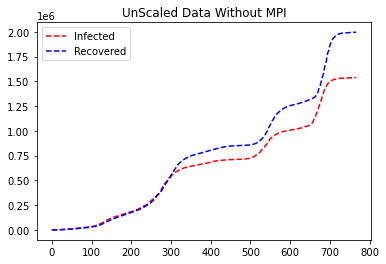

++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++

CPU time for data preprocessing without scaling in seconds: 0.15263870900000054


In [3]:
#get the start time
start =process_time()

data_process(data, scaler, "no")

stop = process_time()

print("++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing without scaling in seconds:",stop-start) 

## Data Preprocessing with MPI

In [4]:
%%file mpi.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()

df = pd.read_csv("tndata.csv")
shared = df

if rank == 0:
    data = shared
    # time.sleep(5)
    comm.send(data,dest =1)
    comm.send(data,dest =2)
    print('from rank',rank,'we sent',data.head())
    #time.sleep(5)

if rank == 1:
    data = comm.recv(source = 0)
    print('on node',rank,'we recevied',data.head())
    
if rank ==2:
    data = comm.recv(source = 0)
    print('on node',rank,'we recevied',data.head())

Overwriting mpi.py


In [5]:
#get the start time
start =process_time()

!mpiexec  -np 4 python mpi.py

stop = process_time()

print("++++++++++++++++++Data Processing with MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

--------------------------------------------------------------------------
detected:

  Local host:            hamilton03
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4117

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: hamilton03
-----------------------------------------------------------------